In [1]:
import pandas as pd
import gensim
import pickle
from gensim.models import CoherenceModel

n_topics = 10

with open('dictionary_r.pkl', 'rb') as fp:
    dictionary_r = pickle.load(fp)
dictionary_r.filter_extremes(no_below=10, no_above=0.5)
    
with open('corpus_r.pkl', 'rb') as fp:
    corpus_r = pickle.load(fp)

#senlda_r = gensim.models.ldamodel.LdaModel(corpus=corpus_r, id2word=dictionary_r, num_topics=n_topics, alpha='auto', eta='auto')

#senlda_r.save('Models/Model_20')

In [44]:
'annualizing' in dictionary_r.values()

False

In [2]:
with open('../indus_wanted.pkl', 'rb') as fp:
    indus_wanted = pickle.load(fp)
indus_wanted

In [3]:
corpus_wanted = [corpus_r[i] for i in indus_wanted.index]

In [35]:
len(corpus_wanted)

16411

In [36]:
with open('idfs.pickle', 'rb') as handle:
    doc_freq = pickle.load(handle)

In [37]:
# getting the unusual words into wanted_words 
wanted_words = []
for k,v in doc_freq.items():
    
    if v >= 4:
        wanted_words.append(k)
        
      

In [39]:
# modify corpus_wanted to only contain bag of wanted words
for cor in corpus_wanted:
    for tup in cor:
        if tup[0] not in wanted_words:
            cor.remove(tup) 

In [40]:
senlda_r_idf = gensim.models.ldamodel.LdaModel(corpus=corpus_wanted, id2word=dictionary_r, num_topics=8, alpha='auto', eta='auto')

In [41]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(senlda_r_idf, corpus_wanted, dictionary_r)
#pyLDAvis.save_html(vis, 'topic_model——2.html')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.137868 -0.042926       1        1  24.259826
6     -0.064109  0.066246       2        1  18.077653
1     -0.032652  0.137759       3        1  11.716864
7     -0.169178 -0.117234       4        1  10.794287
5     -0.059615 -0.031063       5        1  10.207899
0      0.048707 -0.038639       6        1   9.147811
2      0.136352 -0.038945       7        1   8.125564
3      0.002627  0.064801       8        1   7.670096, topic_info=                Term           Freq          Total Category  logprob  loglift
1032      capitalize   91199.000000   91199.000000  Default  30.0000  30.0000
1157          needed  121640.000000  121640.000000  Default  29.0000  29.0000
1953     departments   98571.000000   98571.000000  Default  28.0000  28.0000
1075    dispositions   81424.000000   81424.000000  Default  27.0000  27.0000
1062           crude   62301.000000   62301.000000  Default  26.0000  26.0000
...              ...            ...            ...      ...      ...      ...
1197  qualifications    3671.665663   27664.270595   Topic8  -5.7121   0.5483
465             step    3127.030159   24715.430548   Topic8  -5.8727   0.5005
1397       difficult    3151.856518   43485.193564   Topic8  -5.8648  -0.0566
1179       petroleum    2548.221011   14300.808911   Topic8  -6.0774   0.8429
727        incentive    2553.455180   16408.694736   Topic8  -6.0753   0.7075

[523 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1616      1  0.285247   .
1616      2  0.096315   .
1616      3  0.038060   .
1616      4  0.004665   .
1616      5  0.296227   .
...     ...       ...  ...
1841      4  0.010955    ®
1841      5  0.011289    ®
1841      6  0.725288    ®
1841      7  0.190657    ®
1841      8  0.010543    ®

[3210 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 2, 8, 6, 1, 3, 4])

In [5]:
senlda_r = gensim.models.ldamodel.LdaModel(corpus=corpus_wanted, id2word=dictionary_r, num_topics=8, alpha='auto', eta='auto')

In [8]:
topic_words = {}
for i in range(8):
    topic_words['topic_{}'.format(i)] = senlda_r.show_topic(i, topn=20)

In [9]:
topic_words

{'topic_0': [('contribute', 0.026547948),
  ('objective', 0.020729642),
  ('deliver', 0.020503284),
  ('computation', 0.019785121),
  ('leader', 0.013518803),
  ('departments', 0.013203118),
  ('contained', 0.012596364),
  ('recruitment', 0.01105012),
  ('marine', 0.0093968045),
  ('consolidation', 0.007747696),
  ('utilizing', 0.0071803806),
  ('advisor', 0.0071300734),
  ('deployment', 0.006945701),
  ('older', 0.006856244),
  ('properly', 0.006495217),
  ('tools', 0.006317994),
  ('yields', 0.0057283053),
  ('controlling', 0.0054458375),
  ('reportable', 0.005434895),
  ('techniques', 0.0052399295)],
 'topic_1': [('departments', 0.048260435),
  ('computation', 0.014096448),
  ('marketable', 0.011995109),
  ('difficult', 0.010523556),
  ('seasonal', 0.009192212),
  ('transformation', 0.0074940594),
  ('suspension', 0.0072141257),
  ('marine', 0.007199212),
  ('situation', 0.006854321),
  ('properly', 0.00638741),
  ('deployment', 0.005837015),
  ('engagement', 0.0050909724),
  ('tran

In [12]:
pyLDAvis.save_html(vis, 'topic_model——8selected.html')

In [13]:
import pandas as pd
ldaDF = pd.DataFrame({
        'id' : list(range(len(corpus_wanted))),
        'topics' : [senlda_r.get_document_topics(bow) for bow in corpus_wanted]
    })
#ldaDF

In [15]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(8)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(8):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

ldaDF

,id,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7
0,0,"[(3, 0.2690292), (5, 0.10960565), (6, 0.615599)]",0.0,0.0,0.000000,0.269029,0.000000,0.109606,0.615599,0.000000
1,1,"[(3, 0.31462488), (5, 0.08070021), (6, 0.59155...",0.0,0.0,0.000000,0.314625,0.000000,0.080700,0.591559,0.012838
2,2,"[(3, 0.25783938), (5, 0.10982069), (6, 0.62797...",0.0,0.0,0.000000,0.257839,0.000000,0.109821,0.627972,0.000000
3,3,"[(3, 0.28279448), (5, 0.076832086), (6, 0.6223...",0.0,0.0,0.000000,0.282794,0.000000,0.076832,0.622394,0.017688
4,4,"[(3, 0.3599165), (4, 0.018089328), (5, 0.06759...",0.0,0.0,0.000000,0.359917,0.018089,0.067599,0.554040,0.000000
...,...,...,...,...,...,...,...,...,...,...
16406,16406,"[(2, 0.40805125), (7, 0.58733964)]",0.0,0.0,0.408051,0.000000,0.000000,0.000000,0.000000,0.587340
16407,16407,"[(2, 0.33551085), (3, 0.043860674), (7, 0.6203...",0.0,0.0,0.335511,0.043861,0.000000,0.000000,0.000000,0.620342
16408,16408,"[(3, 0.089537956), (7, 0.91011506)]",0.0,0.0,0.000000,0.089538,0.000000,0.000000,0.000000,0.910115
16409,16409,"[(2, 0.14838812), (3, 0.016730325), (7, 0.8346...",0.0,0.0,0.148388,0.016730,0.000000,0.000000,0.000000,0.834647


In [16]:
with open('../indus_wanted.pkl', 'rb') as fp:
    indus_wanted = pickle.load(fp)

#indus_wanted

In [17]:
indus_wanted['FDATE'] = indus_wanted['FDATE'].astype(str)

In [18]:
indus_wanted['year'] = [row['FDATE'][0:4] for i,  row in indus_wanted.iterrows()]

In [19]:
indus_wanted['year'] = indus_wanted['year'].astype(float)

In [47]:
indus_wanted

,gvkey,FDATE,permno,ma_ret,RET,vwret,FName,gind,wanted1,wanted2,wanted3,wanted4,category,year
7,11903,20100114,10025,-0.030430,0.023926,0.0024,0001193125-10-006494.txt,151030.0,False,True,False,False,material,2010.0
8,11903,20110114,10025,0.066290,0.066775,0.0069,0001193125-11-008295.txt,151030.0,False,True,False,False,material,2011.0
9,11903,20120117,10025,0.034458,0.029080,0.0036,0001193125-12-013914.txt,151030.0,False,True,False,False,material,2012.0
10,11903,20130122,10025,-0.004012,0.000162,0.0048,0001193125-13-019043.txt,151030.0,False,True,False,False,material,2013.0
11,11903,20140114,10025,0.012214,0.035475,0.0115,0001193125-14-010742.txt,151030.0,False,True,False,False,material,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37715,66228,20100728,93398,-0.110737,0.001770,-0.0082,0000943440-10-000447.txt,101020.0,True,False,False,False,energy,2010.0
37716,66228,20110729,93398,-0.426273,-0.183333,-0.0056,0000943440-11-000404.txt,101020.0,True,False,False,False,energy,2011.0
37717,66228,20120716,93398,-0.122059,-0.054348,-0.0031,0000785968-12-000030.txt,101020.0,True,False,False,False,energy,2012.0
37718,66228,20130715,93398,-0.003624,-0.007389,0.0020,0000785968-13-000065.txt,101020.0,True,False,False,False,energy,2013.0


In [48]:
with open('indus_wanted.pickle', 'wb') as handle:
    pickle.dump(indus_wanted, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [21]:
ldaDF['year'] = list(indus_wanted['year'])

In [22]:
ldaDF['year'] = list(indus_wanted['year'])
ldaDF['category'] = list(indus_wanted['category'])

In [23]:
ldaDF

,id,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,year,category
0,0,"[(3, 0.2690292), (5, 0.10960565), (6, 0.615599)]",0.0,0.0,0.000000,0.269029,0.000000,0.109606,0.615599,0.000000,2010.0,material
1,1,"[(3, 0.31462488), (5, 0.08070021), (6, 0.59155...",0.0,0.0,0.000000,0.314625,0.000000,0.080700,0.591559,0.012838,2011.0,material
2,2,"[(3, 0.25783938), (5, 0.10982069), (6, 0.62797...",0.0,0.0,0.000000,0.257839,0.000000,0.109821,0.627972,0.000000,2012.0,material
3,3,"[(3, 0.28279448), (5, 0.076832086), (6, 0.6223...",0.0,0.0,0.000000,0.282794,0.000000,0.076832,0.622394,0.017688,2013.0,material
4,4,"[(3, 0.3599165), (4, 0.018089328), (5, 0.06759...",0.0,0.0,0.000000,0.359917,0.018089,0.067599,0.554040,0.000000,2014.0,material
...,...,...,...,...,...,...,...,...,...,...,...,...
16406,16406,"[(2, 0.40805125), (7, 0.58733964)]",0.0,0.0,0.408051,0.000000,0.000000,0.000000,0.000000,0.587340,2010.0,energy
16407,16407,"[(2, 0.33551085), (3, 0.043860674), (7, 0.6203...",0.0,0.0,0.335511,0.043861,0.000000,0.000000,0.000000,0.620342,2011.0,energy
16408,16408,"[(3, 0.089537956), (7, 0.91011506)]",0.0,0.0,0.000000,0.089538,0.000000,0.000000,0.000000,0.910115,2012.0,energy
16409,16409,"[(2, 0.14838812), (3, 0.016730325), (7, 0.8346...",0.0,0.0,0.148388,0.016730,0.000000,0.000000,0.000000,0.834647,2013.0,energy


In [24]:
lda_topic_compo = ldaDF.groupby(['category','year']).mean()
lda_topic_compo

id   topic_0   topic_1   topic_2   topic_3  \
category year                                                          
IT       2010.0  8301.950092  0.007607  0.005996  0.037782  0.800213   
         2011.0  8363.175472  0.008110  0.005324  0.037957  0.814862   
         2012.0  8280.790353  0.008934  0.006373  0.041480  0.818471   
         2013.0  8197.551724  0.009334  0.006314  0.044831  0.820737   
         2014.0  8225.734848  0.008430  0.005029  0.052021  0.824592   
         2015.0  8268.182857  0.008298  0.004729  0.054699  0.825814   
         2016.0  8280.465263  0.007993  0.005660  0.050736  0.823879   
         2017.0  8510.876068  0.009012  0.006684  0.053111  0.826029   
         2018.0  8643.286976  0.008510  0.006027  0.060996  0.820227   
         2019.0  8560.418764  0.009701  0.006114  0.071191  0.805341   
         2020.0  8494.330097  0.010680  0.007191  0.071926  0.805587   
energy   2010.0  8321.257028  0.003613  0.002248  0.052883  0.076193   
         2011.0  8216.673469  0.003296  0.001574  0.048025  0.073648   
         2012.0  8157.459854  0.001760  0.001160  0.042919  0.071798   
         2013.0  7835.215054  0.002229  0.002700  0.055763  0.069507   
         2014.0  7895.811644  0.002323  0.001741  0.051406  0.073530   
         2015.0  7947.288809  0.001871  0.002321  0.060177  0.078084   
         2016.0  8061.823755  0.002354  0.003551  0.064820  0.079146   
         2017.0  8137.484127  0.002798  0.003314  0.074683  0.078134   
         2018.0  8445.380753  0.002663  0.003345  0.080105  0.096808   
         2019.0  8483.711009  0.001651  0.005044  0.070319  0.099830   
         2020.0  8425.656716  0.001874  0.003864  0.067391  0.107165   
finance  2010.0  7943.106643  0.414065  0.082096  0.130313  0.033180   
         2011.0  7936.560420  0.437193  0.083471  0.121373  0.034187   
         2012.0  7894.484140  0.451261  0.086260  0.124853  0.032676   
         2013.0  7818.688027  0.450662  0.099656  0.131083  0.031944   
         2014.0  7720.789137  0.442043  0.108517  0.146251  0.031387   
         2015.0  7887.974763  0.448461  0.108995  0.162217  0.032834   
         2016.0  7889.566007  0.449834  0.111959  0.176872  0.035577   
         2017.0  7907.970248  0.452632  0.113071  0.176697  0.035501   
         2018.0  7960.785235  0.449315  0.113694  0.184888  0.036554   
         2019.0  7949.658579  0.451167  0.115541  0.183951  0.035611   
         2020.0  7971.023009  0.454479  0.118053  0.189719  0.037332   
material 2010.0  9184.350993  0.006792  0.000819  0.059915  0.120510   
         2011.0  9120.248408  0.007167  0.000772  0.072007  0.114774   
         2012.0  8704.515723  0.004536  0.001429  0.073789  0.106213   
         2013.0  8579.935897  0.005135  0.001548  0.083811  0.104419   
         2014.0  8730.146497  0.006449  0.001229  0.090074  0.105595   
         2015.0  8903.562914  0.006400  0.000200  0.085188  0.104975   
         2016.0  8911.631579  0.007442  0.004457  0.086385  0.110604   
         2017.0  9010.262069  0.007714  0.004254  0.090468  0.103185   
         2018.0  9155.964539  0.007422  0.004180  0.083594  0.104013   
         2019.0  9232.043478  0.005080  0.004839  0.095807  0.093000   
         2020.0  9388.587413  0.005693  0.004800  0.081081  0.102314   

                  topic_4   topic_5   topic_6   topic_7  
category year                                            
IT       2010.0  0.005058  0.060387  0.078635  0.002719  
         2011.0  0.005134  0.047379  0.076869  0.002678  
         2012.0  0.004104  0.039538  0.076683  0.002697  
         2013.0  0.003909  0.029059  0.081233  0.002704  
         2014.0  0.004478  0.019852  0.080532  0.003239  
         2015.0  0.003576  0.016807  0.080995  0.003202  
         2016.0  0.003444  0.013868  0.089103  0.003521  
         2017.0  0.003338  0.009046  0.087612  0.003494  
         2018.0  0.002678  0.006534  0.090978  0.002236  
         2019.0  0.002416  0.005244  0.095627  0.002438  
         2020.0  

In [46]:
lda_topic_compo

with open('topic_change_8.pickle', 'wb') as handle:
    pickle.dump(lda_topic_compo, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [74]:
lda_topic_compo[22:33]

id   topic_0   topic_1   topic_2   topic_3
category year                                                       
finance  2010.0  7943.106643  0.049948  0.453358  0.324602  0.171131
         2011.0  7936.560420  0.051041  0.435159  0.347012  0.165810
         2012.0  7894.484140  0.048271  0.420814  0.361733  0.168380
         2013.0  7818.688027  0.048220  0.425575  0.351042  0.174340
         2014.0  7720.789137  0.046354  0.422162  0.343573  0.186893
         2015.0  7887.974763  0.049723  0.420730  0.339831  0.188761
         2016.0  7889.566007  0.054142  0.413023  0.336668  0.195275
         2017.0  7907.970248  0.055431  0.410588  0.338014  0.194868
         2018.0  7960.785235  0.057687  0.404777  0.332448  0.203948
         2019.0  7949.658579  0.058389  0.402072  0.334383  0.204172
         2020.0  7971.023009  0.059036  0.399594  0.333446  0.207009

In [26]:
year = list(range(2010, 2021))

colors = ['blue','olive','red','green','yellow','orange','black','purple','grey','navy','pink']

/Users/daphne/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/daphne/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


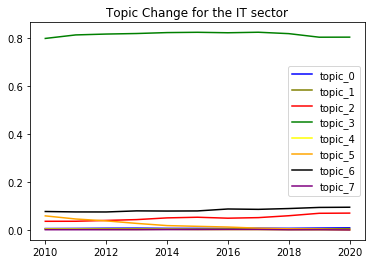

In [27]:
import matplotlib.pyplot as plt

row = lda_topic_compo[0:11]

plt.title('Topic Change for the IT sector')


for i,k in enumerate(list(topic_words.keys())):

    plt.plot(year, row[k],color=colors[i], label = k)

plt.legend()

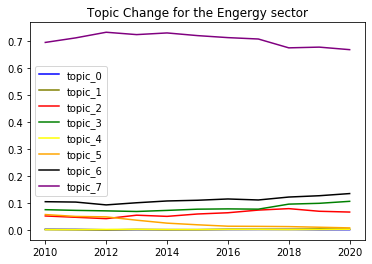

In [31]:

row = lda_topic_compo[11:22]
plt.title('Topic Change for the Engergy sector')


for i,k in enumerate(list(topic_words.keys())):

    plt.plot(year, row[k],color=colors[i], label = k)

plt.legend()

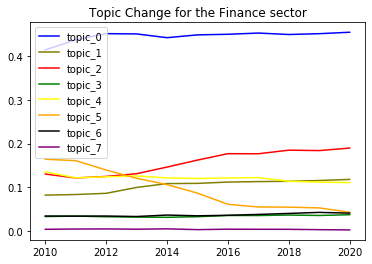

In [32]:
row = lda_topic_compo[22:33]
plt.title('Topic Change for the Finance sector')


for i,k in enumerate(list(topic_words.keys())):

    plt.plot(year, row[k],color=colors[i], label = k)

plt.legend()

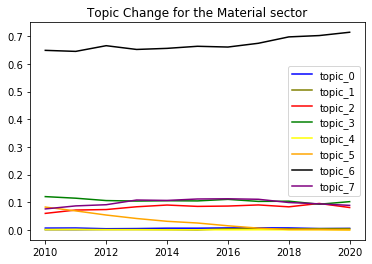

In [33]:
row = lda_topic_compo[33:44]
plt.title('Topic Change for the Material sector')


for i,k in enumerate(list(topic_words.keys())):

    plt.plot(year, row[k],color=colors[i], label = k)

plt.legend()

In [52]:
topic_words

{'topic_0': [('contribute', 0.026547948),
  ('objective', 0.020729642),
  ('deliver', 0.020503284),
  ('computation', 0.019785121),
  ('leader', 0.013518803),
  ('departments', 0.013203118),
  ('contained', 0.012596364),
  ('recruitment', 0.01105012),
  ('marine', 0.0093968045),
  ('consolidation', 0.007747696),
  ('utilizing', 0.0071803806),
  ('advisor', 0.0071300734),
  ('deployment', 0.006945701),
  ('older', 0.006856244),
  ('properly', 0.006495217),
  ('tools', 0.006317994),
  ('yields', 0.0057283053),
  ('controlling', 0.0054458375),
  ('reportable', 0.005434895),
  ('techniques', 0.0052399295)],
 'topic_1': [('departments', 0.048260435),
  ('computation', 0.014096448),
  ('marketable', 0.011995109),
  ('difficult', 0.010523556),
  ('seasonal', 0.009192212),
  ('transformation', 0.0074940594),
  ('suspension', 0.0072141257),
  ('marine', 0.007199212),
  ('situation', 0.006854321),
  ('properly', 0.00638741),
  ('deployment', 0.005837015),
  ('engagement', 0.0050909724),
  ('tran

In [10]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(senlda_r, corpus_wanted, dictionary_r)
#pyLDAvis.save_html(vis, 'topic_model——2.html')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.127445 -0.017870       1        1  21.737011
3     -0.091751  0.101961       2        1  20.517792
7     -0.165350 -0.106723       3        1  13.492367
6     -0.072517  0.057518       4        1  11.532128
2     -0.030297 -0.003580       5        1  10.005241
1      0.093640 -0.011715       6        1   8.365799
4      0.074505  0.039834       7        1   8.225351
5      0.064325 -0.059425       8        1   6.124313, topic_info=               Term           Freq          Total Category  logprob  loglift
1157         needed  238322.000000  238322.000000  Default  30.0000  30.0000
1032     capitalize  184840.000000  184840.000000  Default  29.0000  29.0000
1953    departments  230563.000000  230563.000000  Default  28.0000  28.0000
1075   dispositions  158701.000000  158701.000000  Default  27.0000  27.0000
1062          crude  125429.000000  125429.000000  Default  26.0000  26.0000
...             ...            ...            ...      ...      ...      ...
109     continually    4436.053393   53124.642110   Topic8  -5.9882   0.3100
527       utilizing    4679.742837   77730.078204   Topic8  -5.9347  -0.0171
125         decided    4074.076626   33232.365754   Topic8  -6.0733   0.6940
1867          fresh    4124.889904   37332.403446   Topic8  -6.0609   0.5901
102   consolidation    4176.452629   83754.242604   Topic8  -6.0485  -0.2055

[555 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
3309      1  0.038985  2)(3
3309      2  0.008791  2)(3
3309      3  0.077970  2)(3
3309      4  0.180783  2)(3
3309      5  0.685677  2)(3
...     ...       ...   ...
1841      4  0.050255     ®
1841      5  0.008337     ®
1841      6  0.093983     ®
1841      7  0.775077     ®
1841      8  0.012635     ®

[3451 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 8, 7, 3, 2, 5, 6])